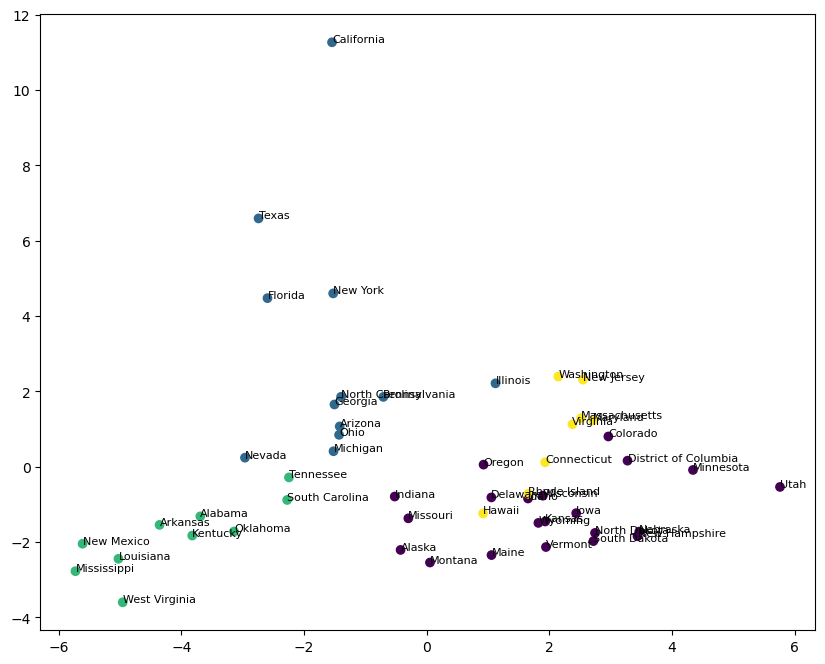

In [22]:
"""
Preprocesses the input data frame by imputing missing values with median, standardizing the features, and applying PCA for dimensionality reduction.

Fits a KMeans clustering model on the PCA-transformed data and plots the clusters.
"""

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


def preprocess(df):
    imputer = SimpleImputer(strategy="median")
    imputed_df = pd.DataFrame(imputer.fit_transform(df))
    scaled_df = StandardScaler().fit_transform(imputed_df)
    return scaled_df


def display_loadings(fitted_pca, features, component=0):
    loadings = fitted_pca.components_
    order = np.argsort(abs(loadings[component, :]))[::]  # Reverse the order
    loadings = loadings[:, order]
    features = [features[i] for i in order]

    loadings = pd.Series(loadings[component, :], index=features)
    fig, ax = plt.subplots(figsize=(10, 12))
    loadings.plot(kind="barh")

    return loadings


df = pd.read_csv("data/DS_salary_factors.csv", na_values=0)

numeric_features = df.select_dtypes(include="number").columns
X = df[numeric_features]
X = preprocess(X)
pca = PCA().fit(X)
X_pca = pca.transform(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="viridis")
for i, label in enumerate(df.GeoName):
    ax.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=8)


Gas Tax (cents)                                              0.004522
percent Good Air Quality Days                               -0.009822
Military Insured                                            -0.024727
GeoFips                                                      0.041146
2022 GDP                                                     0.043725
Property crime rate per 100,000 people                      -0.050987
Medicare Insured                                            -0.058117
Total Employment in State/Area                              -0.072727
Total Civilian Labor Force in State/Area                    -0.072908
Total Unemployment in State/Area                            -0.076062
Total Civilian Non-Institutional Population in State/Area   -0.082710
Non-Group Insured                                            0.101184
Percent (%) of Labor Force Unemployed in State/Area         -0.118587
Poverty (thousands)                                         -0.123583
Violent crime rate p

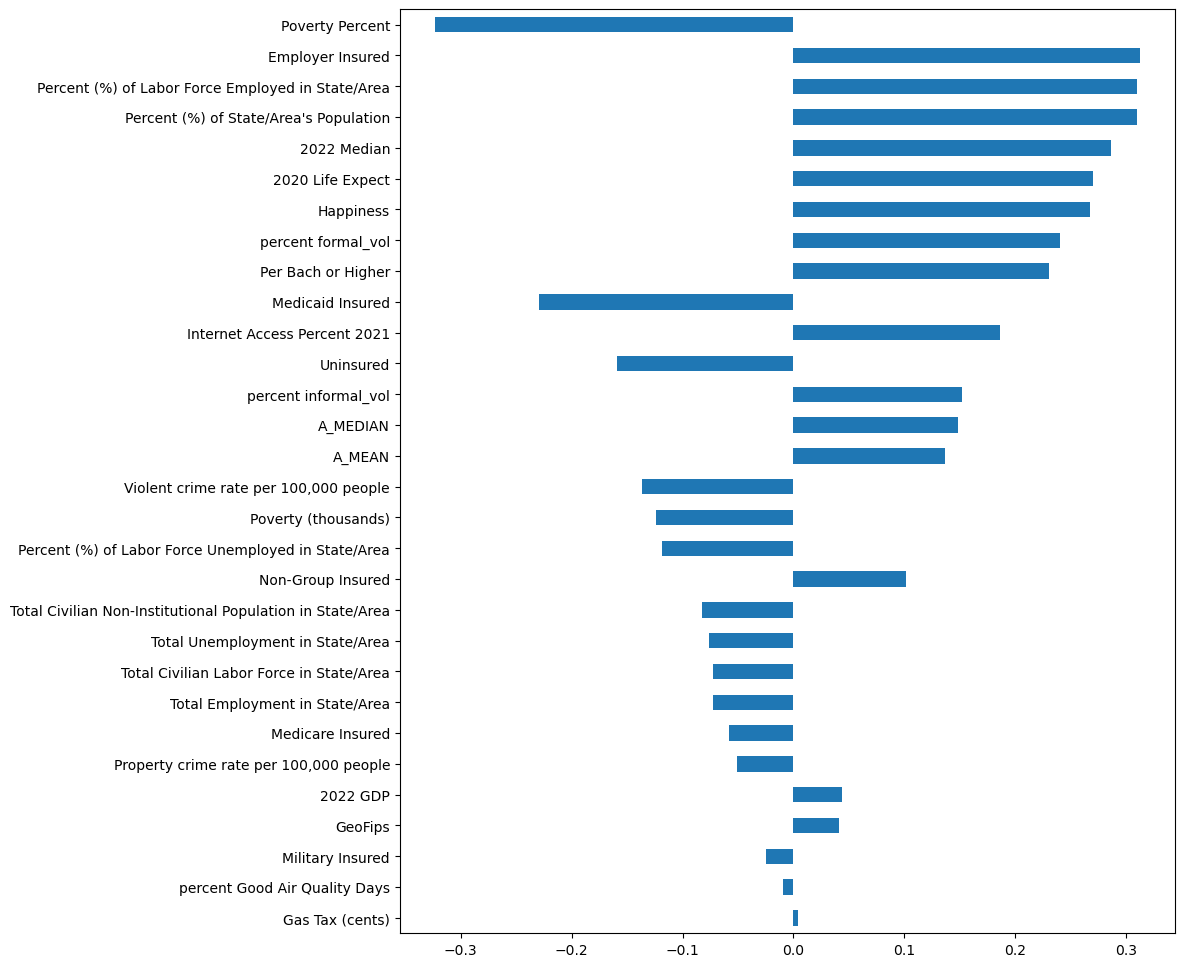

In [23]:
display_loadings(pca, numeric_features)


A_MEDIAN                                                    -0.028930
2022 GDP                                                    -0.031127
Employer Insured                                             0.031955
A_MEAN                                                       0.037491
percent formal_vol                                           0.040780
Uninsured                                                    0.044788
Total Unemployment in State/Area                            -0.052853
Poverty (thousands)                                         -0.061776
Total Civilian Labor Force in State/Area                    -0.070053
Total Employment in State/Area                              -0.070714
Internet Access Percent 2021                                 0.074852
Non-Group Insured                                           -0.074925
Total Civilian Non-Institutional Population in State/Area   -0.075484
Happiness                                                   -0.077608
Percent (%) of Labor

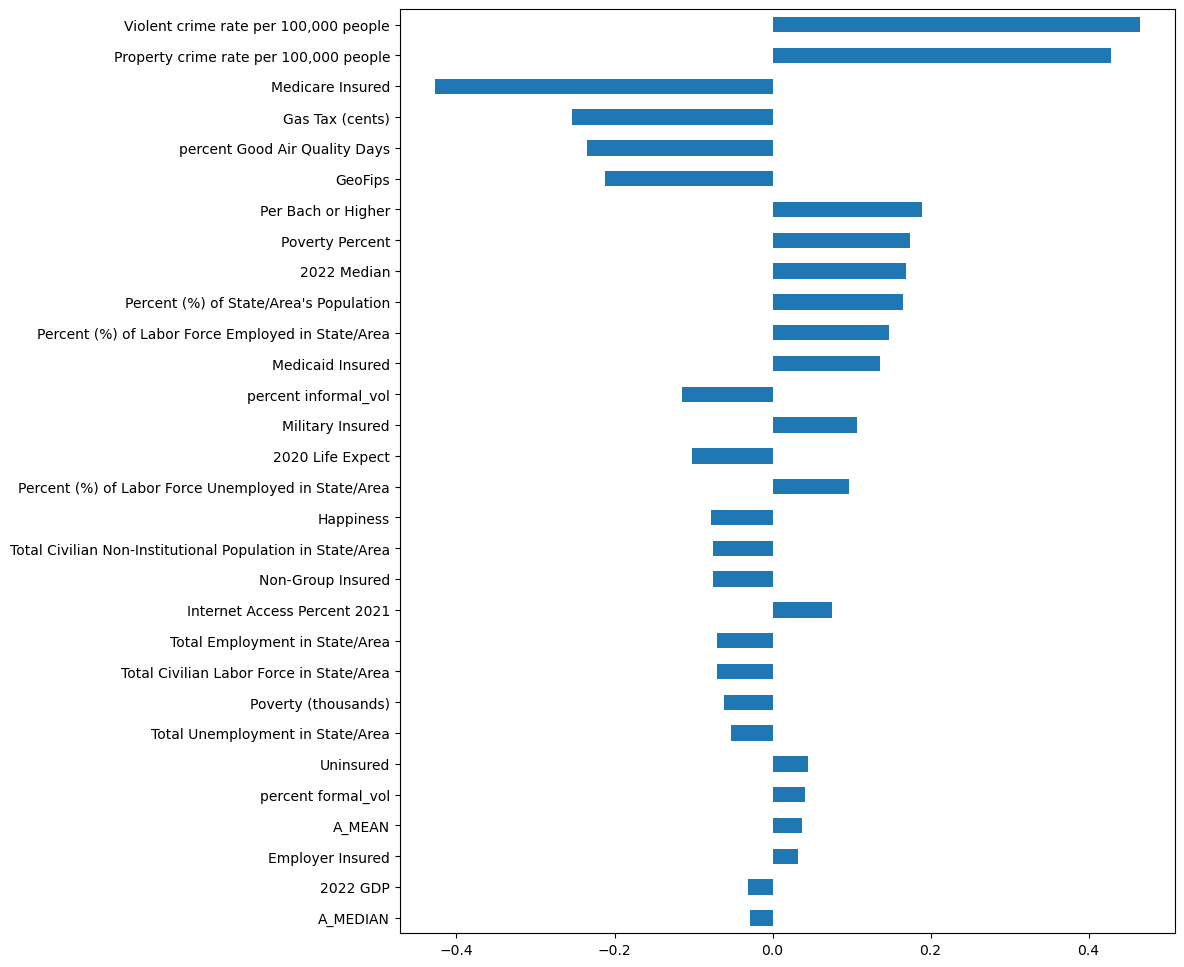

In [25]:
display_loadings(pca, numeric_features, 2)
